### **Assignment-4**

## **ID:-202011050**


Text(0.5, 1.0, 'D1')

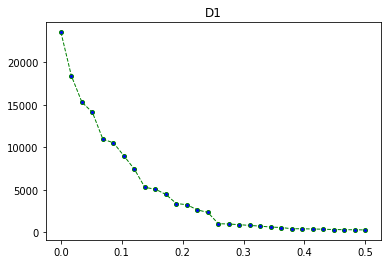

In [ ]:
import pickle
import matplotlib.pyplot as plt 
pickle_off = open ("drive/MyDrive/IR file/YASS/D1_x.txt", "rb")
x1 = pickle.load(pickle_off)
pickle_off = open ("drive/MyDrive/IR file/YASS/D1_y.txt", "rb")
y1 = pickle.load(pickle_off)

plt.plot(x1, y1, color='green', linestyle='dashed', linewidth = 1,
         marker='o', markerfacecolor='blue', markersize=4)
plt.title("D1")

Text(0.5, 1.0, 'D2')

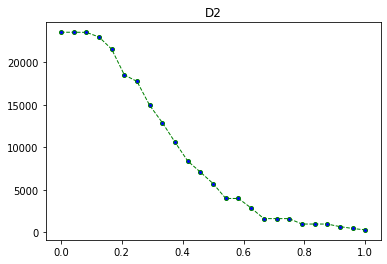

In [ ]:
import pickle
import matplotlib.pyplot as plt 
pickle_off = open ("drive/MyDrive/IR file/YASS/D2_x.txt", "rb")
x2 = pickle.load(pickle_off)
pickle_off = open ("drive/MyDrive/IR file/YASS/D2_y.txt", "rb")
y2 = pickle.load(pickle_off)

plt.plot(x2, y2, color='green', linestyle='dashed', linewidth = 1,
         marker='o', markerfacecolor='blue', markersize=4)
plt.title("D2")

Text(0.5, 1.0, 'D3')

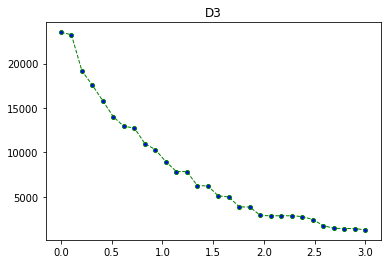

In [ ]:
import pickle
import matplotlib.pyplot as plt 
pickle_off = open ("drive/MyDrive/IR file/YASS/D3_x.txt", "rb")
x3 = pickle.load(pickle_off)
pickle_off = open ("drive/MyDrive/IR file/YASS/D3_y.txt", "rb")
y3 = pickle.load(pickle_off)

plt.plot(x3, y3, color='green', linestyle='dashed', linewidth = 1,
         marker='o', markerfacecolor='blue', markersize=4)
plt.title("D3")

Text(0.5, 1.0, 'D4')

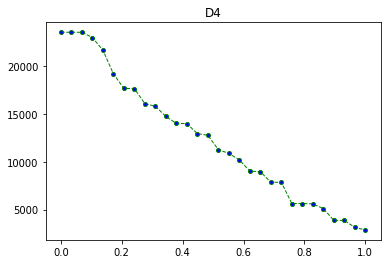

In [ ]:
import pickle
import matplotlib.pyplot as plt 
pickle_off = open ("drive/MyDrive/IR file/YASS/D4_x.txt", "rb")
x4 = pickle.load(pickle_off)
pickle_off = open ("drive/MyDrive/IR file/YASS/D4_y.txt", "rb")
y4 = pickle.load(pickle_off)

plt.plot(x4, y4, color='green', linestyle='dashed', linewidth = 1,
         marker='o', markerfacecolor='blue', markersize=4)
plt.title("D4")

# preprocessing (from Assignment-3) 

In [ ]:
!pip install pyunpack
!pip install patool
from pyunpack import Archive
Archive('drive/MyDrive/IR file/Fire_dataset/FIRE_Dataset_EN_2010.rar').extractall('/content/DATA_SET/')

     |████████████████████████████████| 81kB 3.6MB/s 


In [ ]:
Archive('/content/DATA_SET/FIRE_Dataset_EN_2010/English-Data.tgz').extractall('/content/DATA_SET/FIRE_Dataset_EN_2010/ENGLISH/')

In [ ]:
import os
import re
import math
import numpy as np
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from prettytable import PrettyTable
import pandas as pd
from IPython.display import display
from dask import delayed
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def read_doc(path):
  global docs
  global docs_list
  for file in os.listdir(path):
    if os.path.isdir(os.path.join(path,file)):
      read_doc(os.path.join(path,file))
    else:
      if file.find("index") == -1:
        fi = open(os.path.join(path,file),'r')
        bs = BeautifulSoup(fi.read())
        doc_id = bs.find("docno").text
        global i 
        i += 1
        index[doc_id] = i
        docs_list.append(doc_id)
        docs.append(bs.find("text").text)

In [ ]:
global i 
index = {}
i = -1
docs = []
q_id = []
docs_list = []
read_doc("/content/DATA_SET/FIRE_Dataset_EN_2010/ENGLISH/")
fi = open("/content/DATA_SET/FIRE_Dataset_EN_2010/en.topics.76-125.2010.txt",'r')
data = fi.read()
bs = BeautifulSoup(data)
q_id = [int(id.text) for id in bs.find_all("num")]   # load Query file and store in list
desc = [desc.text for desc in bs.find_all("desc")]  # here we use desc for query matching
 
docs.extend(desc)    #here we extend document list with query file, bcoz query is also treated as document for calculating TFIDF
 
for id in q_id:
  i += 1
  index[id] = i

In [ ]:
import pickle
global d4_val
pickle_off = open ("drive/MyDrive/IR file/YASS/D4_dict.txt", "rb")
d4_val = pickle.load(pickle_off)

# YASS

In [ ]:
def YASS(val):
  if val in d4_val.keys():
    return d4_val[val]
  else:
    return val

In [ ]:
class preprocessing:
  def __init__(self):
    self.docs_tokenized = [] # store token into each DOC list()
    self.words = set()
  def preprocess(self,docs):
    temp = []
    for doc in docs:
      doc = re.sub('(\d|[^\w\s])','',doc) #removing punctuations and digits
      doc = nltk.word_tokenize(doc.lower()) #tokenizing
      sw = stopwords.words('english')
      doc = [token for token in doc  if token not in sw]# removing stop words
      doc = [YASS(x) for x in doc] #lemmitizing
      self.docs_tokenized.append(doc)
      temp.extend(doc)
    self.words = set(temp)

In [ ]:
ob1 = preprocessing() 
ob1.preprocess(docs)

In [ ]:
docs_dict = []    
for doc in ob1.docs_tokenized:
  temp_dict = {}
  for word in doc:
    temp_dict[word]=temp_dict.get(word,0)+1  # count no of occurence in perticular doc
  docs_dict.append(temp_dict)      #store val in document list which contain dict()  
  

In [ ]:
df = {} #dictionary to store df
for doc in ob1.docs_tokenized:
  for word in set(doc):
    df[word] = df.get(word,0)+1  #count no of document that specific word (IDF)


In [ ]:
idf = {}
N = len(docs_dict)
for word in df:
  idf[word] = math.log(N/df[word])  #here we count IDF value

In [ ]:
class tf_idf:
  def __init__(self,doc_index,idf,docs_dict,words):
    self.doc_index=doc_index
    self.idf = idf
    self.docs_dict = docs_dict
    self.words = words  
  def getvectordict(self,doc_id):
    vector = {}
    doc = self.docs_dict[self.doc_index[doc_id]]  #Getting doc from docs dictionary with help of index
    n = sum(doc.values())
    if n!= 0:
      for word in doc:
        tf = doc[word] / n                        #Calculating tf
        tfidf = tf*self.idf[word]                 #Calculating tf-idf
        if tfidf!=0:
         vector[word] = tfidf
    return vector   
    #here we use Dict() strucure for store data , key="WORD" value="IDF"


In [ ]:
ob2 = tf_idf(index,idf,docs_dict,ob1.words)
queries_tfidf = {}
for q in q_id:
    queries_tfidf[q] = ob2.getvectordict(q)

In [ ]:
docs_tfidf = {}
for doc in docs_list:
    docs_tfidf[doc] = ob2.getvectordict(doc)

In [ ]:
from numpy.linalg import norm
def c_s(a,b):
  dot_pr = 0
  av = list(a.values())
  bv = list(b.values())
  for word in a:
    if word in b:
      dot_pr = dot_pr + (a[word] * b[word])
  return (dot_pr/(norm(av)*norm(bv)))

In [ ]:
cs = {}
for q in q_id:                    # iterating through each query
  qv = queries_tfidf[q]           # getting tfidf of specific query
  temp = {}
  for doc in docs_list:           # calculating cosine similarity of query and document
    dv = docs_tfidf[doc]    
    similarity = c_s(qv,dv)
    if  similarity != 0:               
     temp[doc] = similarity          
  cs[q] = temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [ ]:
from heapq import nlargest
rank_list = {}
for q in q_id:
  rank_list[q] = nlargest(10,cs[q],key = cs[q].get)

In [ ]:
fr = open("/content/DATA_SET/FIRE_Dataset_EN_2010/Relevance.txt",'r')
qr = {}
for line in fr.readlines():
  data = line.split()
  if data[0] not in qr:
   qr[data[0]] = {}
   qr[data[0]][data[2]] = int(data[3])          
  else: 
    qr[data[0]][data[2]] = int(data[3])

In [ ]:
avg_precision = []                                
for q in q_id:                                             #Iterating through each query
  rk = rank_list[q]                                        # Getting rank list of specific query
  relevance = 0                                            # Store number of relevant documents found
  count = 0                                                #To store count of docs
  precision_sum = 0 
  for doc in rk: 
    count += 1                         
    if doc in qr[str(q)]:
      if qr[str(q)][doc] == 1:                             #Checking if it's relavant document 
        relevance += 1                          
        precision_sum += (relevance/count)                 #Calculating precision and adding it to local precision_sum                    
  if relevance==0:
    avg_precision.append(0)     
  else:
    avg_precision.append(precision_sum/relevance)
  
map = sum(avg_precision)/len(avg_precision)      

print("MAP : ",map)

MAP :  0.4972597316704459


#Porter Stemmer

In [ ]:
def PoStem(val):
  return nltk.stem.PorterStemmer().stem(val)

In [ ]:
class preprocessing_postem:
  def __init__(self):
    self.docs_tokenized = [] # store token into each DOC list()
    self.words = set()
  def preprocess(self,docs):
    temp = []
    for doc in docs:
      doc = re.sub('(\d|[^\w\s])','',doc) #removing punctuations and digits
      doc = nltk.word_tokenize(doc.lower()) #tokenizing
      sw = stopwords.words('english')
      doc = [token for token in doc  if token not in sw]# removing stop words
      doc = [PoStem(x) for x in doc] #lemmitizing
      self.docs_tokenized.append(doc)
      temp.extend(doc)
    self.words = set(temp)

In [ ]:
ob1 = preprocessing_postem() 
ob1.preprocess(docs)

In [ ]:
docs_dict = []    
for doc in ob1.docs_tokenized:
  temp_dict = {}
  for word in doc:
    temp_dict[word]=temp_dict.get(word,0)+1  # count no of occurence in perticular doc
  docs_dict.append(temp_dict)      #store val in document list which contain dict()  
  

In [ ]:
df = {} #dictionary to store df
for doc in ob1.docs_tokenized:
  for word in set(doc):
    df[word] = df.get(word,0)+1  #count no of document that specific word (IDF)


In [ ]:
idf = {}
N = len(docs_dict)
for word in df:
  idf[word] = math.log(N/df[word])  #here we count IDF value

In [ ]:
ob2 = tf_idf(index,idf,docs_dict,ob1.words)
queries_tfidf = {}
for q in q_id:
    queries_tfidf[q] = ob2.getvectordict(q)

In [ ]:
docs_tfidf = {}
for doc in docs_list:
    docs_tfidf[doc] = ob2.getvectordict(doc)

In [ ]:
from numpy.linalg import norm
def c_s(a,b):
  dot_pr = 0
  av = list(a.values())
  bv = list(b.values())
  for word in a:
    if word in b:
      dot_pr = dot_pr + (a[word] * b[word])
  return (dot_pr/(norm(av)*norm(bv)))

In [ ]:
cs = {}
for q in q_id:                    # iterating through each query
  qv = queries_tfidf[q]           # getting tfidf of specific query
  temp = {}
  for doc in docs_list:           # calculating cosine similarity of query and document
    dv = docs_tfidf[doc]    
    similarity = c_s(qv,dv)
    if  similarity != 0:               
     temp[doc] = similarity          
  cs[q] = temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [ ]:
from heapq import nlargest
rank_list = {}
for q in q_id:
  rank_list[q] = nlargest(10,cs[q],key = cs[q].get)

In [ ]:
fr = open("/content/DATA_SET/FIRE_Dataset_EN_2010/Relevance.txt",'r')
qr = {}
for line in fr.readlines():
  data = line.split()
  if data[0] not in qr:
   qr[data[0]] = {}
   qr[data[0]][data[2]] = int(data[3])          
  else: 
    qr[data[0]][data[2]] = int(data[3])

In [ ]:
avg_precision = []                                
for q in q_id:                                             #Iterating through each query
  rk = rank_list[q]                                        # Getting rank list of specific query
  relevance = 0                                            # Store number of relevant documents found
  count = 0                                                #To store count of docs
  precision_sum = 0 
  for doc in rk: 
    count += 1                         
    if doc in qr[str(q)]:
      if qr[str(q)][doc] == 1:                             #Checking if it's relavant document 
        relevance += 1                          
        precision_sum += (relevance/count)                 #Calculating precision and adding it to local precision_sum                    
  if relevance==0:
    avg_precision.append(0)     
  else:
    avg_precision.append(precision_sum/relevance)
  
map = sum(avg_precision)/len(avg_precision)      

print("MAP : ",map)

MAP :  0.5161717592592594
